In [1]:
from keras.datasets import cifar10        #导入numpy以及cifar10模块
import numpy as np
np.random.seed(10)

/home/luhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_image_train,y_label_train),(x_image_test,y_label_test)=cifar10.load_data()          #读取cifar10数据

In [4]:
print('train data:','images:',x_image_train.shape,'label:',y_label_train.shape)    　　#查看训练数据与验证数据的形状
print('test data:','images:',x_image_test.shape,'labei:',y_label_test.shape)

train data: images: (50000, 32, 32, 3) label: (50000, 1)
test data: images: (10000, 32, 32, 3) labei: (10000, 1)


In [6]:
x_image_train_normalize = x_image_train.astype('float32')/255.0　　　　　　　　　　　　　#将数字图像标准化
x_image_test_normalize = x_image_test.astype('float32')/255.0

In [7]:
from keras.utils import np_utils　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　 #导入np_utils模块
y_label_train_Onehot = np_utils.to_categorical(y_label_train)　　　　　　　　　　　　　　#将数字图像真实值OneHot Ecoding转换
y_label_test_Onehot = np_utils.to_categorical(y_label_test)

In [8]:
from keras.models import Sequential                         #导入Sequential，Dense,Dropout,Flatten,Conv2D,MaxPooling2D模块
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [9]:
model=Sequential()                                          #建立Sequential模型

In [11]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))   #建立卷积层1

In [13]:
model.add(Dropout(0.25))                                    #加入Dropout避免过度拟合

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))                    #建立池化层1

In [21]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))    #建立卷积层2

In [22]:
model.add(Dropout(0.25))                                   #加入Dropout避免过度拟合

In [23]:
model.add(Flatten())                                       #建立平坦层
model.add(Dropout(rate=0.25))                              #加入Dropout避免过度拟合

In [24]:
model.add(Dense(1024,activation='relu'))                   #建立隐藏层
model.add(Dropout(0.25))                                   #加入Dropout避免过度拟合

In [27]:
model.add(Dense(10,activation='softmax'))                  #建立输出层

In [29]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])    #定义训练方式

In [31]:
train_history=model.fit(x_image_train_normalize,y_label_train_Onehot,validation_split=0.2,epochs=10,batch_size=128,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 125s 3ms/step - loss: 1.8297 - acc: 0.3498 - val_loss: 1.5230 - val_acc: 0.4832
Epoch 2/10
40000/40000 [==============================] - 125s 3ms/step - loss: 1.3334 - acc: 0.5201 - val_loss: 1.3150 - val_acc: 0.5834
Epoch 3/10
40000/40000 [==============================] - 125s 3ms/step - loss: 1.1460 - acc: 0.5911 - val_loss: 1.1869 - val_acc: 0.6034
Epoch 4/10
40000/40000 [==============================] - 124s 3ms/step - loss: 1.0166 - acc: 0.6386 - val_loss: 1.1390 - val_acc: 0.6122
Epoch 5/10
40000/40000 [==============================] - 124s 3ms/step - loss: 0.9040 - acc: 0.6764 - val_loss: 1.0678 - val_acc: 0.6453
Epoch 6/10
40000/40000 [==============================] - 126s 3ms/step - loss: 0.7922 - acc: 0.7188 - val_loss: 0.9940 - val_acc: 0.6572
Epoch 7/10
40000/40000 [==============================] - 123s 3ms/step - loss: 0.6875 - acc: 0.7555 - val_loss: 1.0252 - 

In [32]:
import matplotlib.pyplot as plt                       #建立show_train_history显示训练过程
def show_train_history(train_history,train,test):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[test])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc = 'upper left')
    plt.show()

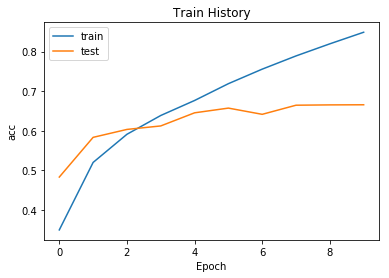

In [34]:
show_train_history(train_history,'acc','val_acc')    #进行准确率评估

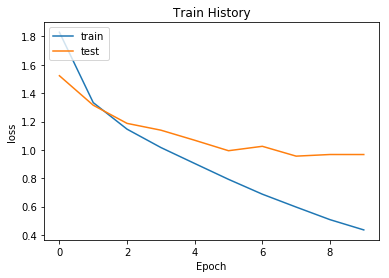

In [35]:
show_train_history(train_history,'loss','val_loss')  #进行误差评估

In [42]:
scores = model.evaluate (x_image_test_normalize,y_label_test_Onehot,verbose=0)    #评估模型准确率
scores[1]

0.6668

In [44]:
prediction=model.predict_classes(x_image_test_normalize)         #执行预测

In [45]:
prediction[:10]

array([3, 1, 8, 0, 6, 6, 1, 6, 3, 1])

In [47]:
import matplotlib.pyplot as plt                             #创建plot_images_labels_prediction函数
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num =25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(prediction[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show

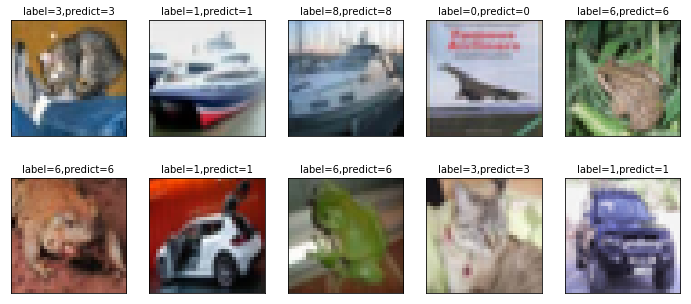

In [48]:
plot_images_labels_prediction(x_image_test,y_label_test,prediction,0,10)          #显示前10项预测结果

In [63]:
predicted_probability=model.predict(x_image_test_normalize)        #使用测试数据进行预测

In [66]:
def show_predicted_probability(y,prediction,x_image,predicted_probability,i):   #建立show_predicted_probability函数
    print('label:',label_dict[y[i][0]],'predict',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_image_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+'probability:%1.9f'%(predicted_probability[i][j]))
label_dict={0:'airplane',1:'automoble',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

label: cat predict cat


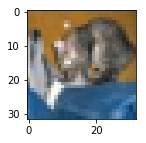

airplaneprobability:0.002195015
automobleprobability:0.000905591
birdprobability:0.021204598
catprobability:0.600571275
deerprobability:0.079567812
dogprobability:0.261526287
frogprobability:0.024176843
horseprobability:0.002047568
shipprobability:0.007212386
truckprobability:0.000592610


In [67]:
show_predicted_probability(y_label_test,prediction,x_image_test,predicted_probability,0) 　　 #查看第0项数据预测概率

label: airplane predict airplane


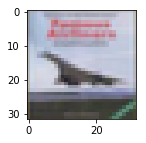

airplaneprobability:0.731823921
automobleprobability:0.008953031
birdprobability:0.023260053
catprobability:0.002134408
deerprobability:0.040461414
dogprobability:0.000168507
frogprobability:0.000186852
horseprobability:0.001450034
shipprobability:0.190120861
truckprobability:0.001440848


In [68]:
show_predicted_probability(y_label_test,prediction,x_image_test,predicted_probability,3)    #查看第3项数据预测概率

In [69]:
prediction.shape               #查看预测结果形状

(10000,)

In [70]:
y_label_test.shape　　　　　　　 #查看y_label_test真实值形状

(10000, 1)

In [71]:
y_label_test.reshape(-1)　　　　#将y_label_test真实值转为一维数组

array([3, 8, 8, ..., 5, 1, 7])

In [72]:
import pandas as pd            #使用pandas crosstab建立混淆矩阵
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automoble', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,658,10,67,28,46,21,36,12,87,35
1,13,758,10,9,14,10,45,5,30,106
2,48,1,471,45,213,50,138,18,12,4
3,8,6,54,402,175,154,165,22,5,9
4,8,1,34,28,765,20,109,25,9,1
5,5,3,41,131,133,558,91,33,1,4
6,2,2,13,27,53,12,883,2,5,1
7,8,2,25,31,178,67,30,650,2,7
8,41,36,15,17,26,13,25,1,800,26


In [16]:
from keras.datasets import cifar10                        #导入numpy以及cifar10模块
import numpy as np
np.random.seed(10)
(x_image_train,y_label_train),(x_image_test,y_label_test)=cifar10.load_data()       #读取cifar10数据
x_image_train_normalize = x_image_train.astype('float32')/255.0                     #将数字图像标准化
x_image_test_normalize = x_image_test.astype('float32')/255.0
from keras.utils import np_utils                                                    #将数字图像真实值OneHot Ecoding转换
y_label_train_Onehot = np_utils.to_categorical(y_label_train)
y_label_test_Onehot = np_utils.to_categorical(y_label_test)
from keras.models import Sequential                        #导入Sequential，Dense,Dropout,Flatten,Conv2D,MaxPooling2D模块
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
model=Sequential()                                         #建立Sequential模型

In [17]:
#建立卷积层1与池化层１
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
#建立卷积层2与池化层2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
#建立卷积层3与池化层3
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
#建立神经网络（平坦层　隐藏层1　隐藏层2　输出层）
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])     #定义训练方式

In [ ]:
train_history=model.fit(x_image_train_normalize,y_label_train_Onehot,validation_split=0.2,epochs=50,batch_size=300,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 174s 4ms/step - loss: 2.0203 - acc: 0.2469 - val_loss: 1.9418 - val_acc: 0.2965
Epoch 2/50
40000/40000 [==============================] - 173s 4ms/step - loss: 1.5537 - acc: 0.4227 - val_loss: 1.6297 - val_acc: 0.4200
Epoch 3/50
40000/40000 [==============================] - 172s 4ms/step - loss: 1.3416 - acc: 0.5093 - val_loss: 1.3545 - val_acc: 0.5064
Epoch 4/50
40000/40000 [==============================] - 175s 4ms/step - loss: 1.1861 - acc: 0.5721 - val_loss: 1.1889 - val_acc: 0.5884
Epoch 5/50
40000/40000 [==============================] - 173s 4ms/step - loss: 1.0794 - acc: 0.6130 - val_loss: 1.0177 - val_acc: 0.6395
Epoch 6/50
40000/40000 [==============================] - 175s 4ms/step - loss: 0.9672 - acc: 0.6562 - val_loss: 0.9255 - val_acc: 0.6734
Epoch 7/50
40000/40000 [==============================] - 176s 4ms/step - loss: 0.9029 - acc: 0.6780 - val_loss: 0.9071 - 

In [ ]:
scores = model.evaluate (x_image_test_normalize,y_label_test_Onehot,verbose=0)    #评估模型准确率
scores[1]